1
[('START', AA:0), ('MOVE', DD:20), ('OPEN', DD:20), ('MOVE', CC:2), ('MOVE', BB:13), ('OPEN', BB:13), ('MOVE', AA:0), ('MOVE', II:0), ('MOVE', JJ:21), ('OPEN', JJ:21), ('MOVE', II:0), ('MOVE', AA:0), ('MOVE', DD:20), ('MOVE', EE:3), ('MOVE', FF:0), ('MOVE', GG:0), ('MOVE', HH:22), ('OPEN', HH:22), ('MOVE', GG:0), ('MOVE', FF:0), ('MOVE', EE:3), ('OPEN', EE:3), ('MOVE', DD:20), ('MOVE', CC:2), ('OPEN', CC:2)]
[(DD:20, 24), (BB:13, 21), (JJ:21, 17), (HH:22, 9), (EE:3, 5), (CC:2, 2)]
1327

2
[('START', AA:0), ('MOVE', DD:20), ('OPEN', DD:20), ('MOVE', CC:2), ('MOVE', BB:13), ('OPEN', BB:13), ('MOVE', AA:0), ('MOVE', II:0), ('MOVE', JJ:21), ('OPEN', JJ:21), ('MOVE', II:0), ('MOVE', AA:0), ('MOVE', DD:20), ('MOVE', EE:3), ('MOVE', FF:0), ('MOVE', GG:0), ('MOVE', HH:22), ('OPEN', HH:22), ('MOVE', GG:0), ('MOVE', FF:0), ('MOVE', EE:3), ('OPEN', EE:3), ('MOVE', DD:20), ('MOVE', CC:2), ('OPEN', CC:2)]
[(DD:20, 24), (BB:13, 21), (JJ:21, 17), (HH:22, 9), (EE:3, 5), (CC:2, 2)]
1327

3
[('START',

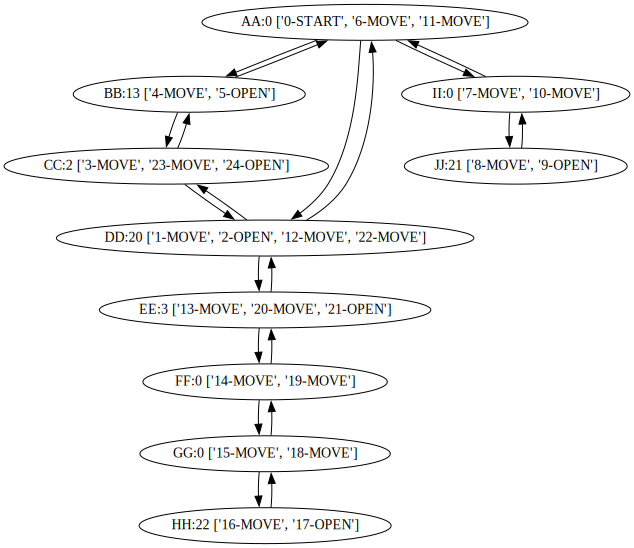

In [68]:
import re
import copy
import graphviz
import time
import itertools

from IPython.display import display, HTML, clear_output
display(HTML("<style>.container { width:100% !important; }</style>"))

from itertools import permutations



class Tunnel:
    def __init__(self, source, flow_rate, targets):
        self.source = source
        self.flow_rate = flow_rate
        self.targets = targets
        self.paths = {}
        
    def get_path(self, tunnel):
        if tunnel in self.paths:
            return self.paths[tunnel]
        
        if self == tunnel:
            return []
        
        seen = {self}
        queue = [(target, [target]) for target in self.targets]
        while queue:
            next_, path = queue.pop(0)
            if next_ in seen:
                continue
                
            seen.add(next_)
            
            if next_.source == tunnel.source:
                self.paths[next_] = path
                return path
            
            queue.extend([(target, path + [target]) for target in next_.targets])
            
        raise Exception('No path found')
        
    def __str__(self):
        return f"{self.source}:{self.flow_rate}"
    
    def __repr__(self):
        return self.__str__()
    
    def __hash__(self):
        return hash(self.source)
    
    
class Actor:
    def __init__(self, position):
        self.position = position
        self.path = [('START', position)]
        self.order = []
        self.enabled = set()
        
    def copy(self):
        actor = Actor(self.position)
        actor.enabled = self.enabled.copy()
        actor.order = copy.copy(self.order)
        actor.path = copy.copy(self.path)
        return actor
        
        
class TunnelSystem:
    def __init__(self, t=30, actors=1):
        self.tunnels = []
        self.actors = []
        self.t = t
    
    def register_tunnel(self, tunnel):
        self.tunnels.append(tunnel)
        # always start at AA
        if tunnel.source == 'AA':
            self.actors = [Actor(tunnel), Actor(position)]

    def hydrate_tunnels(self):
        self.mapping = {tunnel.source: tunnel for tunnel in self.tunnels}
        for tunnel in self.tunnels:
            targets = []
            for target in tunnel.targets:
                targets.append(self.mapping[target])
            
            tunnel.targets = targets

        self.priority = self.get_priority()
        
    def get_visited(self):
        return set().union(*[actor.enabled for actor in self.actors])
    
    def get_priority(self, actor, threshold=0):
        to_visit = []
        for tunnel in self.tunnels:
            visited = self.get_visited()
            if tunnel.flow_rate != 0 and tunnel not in visited:
                value = self.get_score(actor, tunnel)
                if value > threshold:
                    to_visit.append((tunnel, value))
        
        priority = sorted(to_visit, key=lambda t: -t[1])
        
        return priority
    
    def copy(self):
        ts = TunnelSystem(self.t)
        
        ts.tunnels = self.tunnels
        ts.actors = [actor.copy() for actor in self.actors]
        
        return ts

    def is_done(self):
        for actor in self.get_actors:
            if self.get_priority(actor):
                return False
            
        return True
    
    def get_potential_value(self):
        sum_ = 0
        for tunnel in self.tunnels:
            visited = self.get_visited()
            if not tunnel.flow_rate or tunnel in visited:
                continue
            distance = self.get_distance(tunnel)
            total_time_possible = max(self.t - distance, 0)
            potential_value = tunnel.flow_rate * total_time_possible
            sum_ += potential_value
        
        return sum_
    
    def get_states(self, n=1, max_=0):
        if (self.evaluate() + self.get_potential_value()) < max_:
            return []
        
        my_targets = [(actor[0], target) for target in self.get_next_targets(self.actors[0], n=n)]
        el_targets = [(actor[1], target) for target in self.get_next_targets(self.actors[1], n=n)]



        comoves = []
        while my_targets or el_targets:
            my_target = my_targets.pop(0)
            el_target = el_targets.pop(0)
            
            targets = []
            if my_targets:
                targets.append(my_targets.pop(0))
            if el_target:
                targets.append(el_target.pop(0))
            

            actor_to_moves = {}
            shared_length = float('inf')
            for actor, target in targets:
                path = actors.position.get_path(target)
                shared_length = min(min_path, len(path))
                moves = []
                for node in path:
                    move = ('MOVE', node)
                    moves.append(move)
                moves.append(('OPEN', target))
                actor_to_moves[actor] = moves
            
            
                
            comoves.append(comove)
            
        states = []
        for comove in comoves:
            ts = self.copy()

            for actor, move in comove:
                ts.move(actor, move)
            t -= 1

            states.append(ts)
            
        return states

        
    def get_distance(self, actor, tunnel):
        path = actor.position.get_path(tunnel)
        return len(path)
    
    def move(self, actor, movement):
        action, target = movement
        actor.path.append(movement)
        if action == 'OPEN':
            actor.enabled.add(target)
            actor.order.append((target, self.t))
            
        if action == 'MOVE':
            actor.position = target    
            
    def evaluate(self):
        order = itertools.chain([actor.order for actor in self.actors])
        values = [tunnel.flow_rate * t for tunnel, t in order]
        return sum(values)
    
    def __str__(self):
        return f"{self.t}:{self.evaluate()}"
            
    def get_score(self, actor, tunnel):
        distance = self.get_distance(actor, tunnel) or 1
        total_time_possible = max(self.t - distance, 0)
        potential_value = tunnel.flow_rate * total_time_possible
        if not total_time_possible:
            return 0
        return  tunnel.flow_rate**(1/distance)
    
    
    def get_steps(self):
        steps = []
        for actor in self.actors:
            for i, movement in enumerate(actor.path):
                action, position = movement
                steps.append(f"{str(i)}-{action}")
        return steps
    
    def get_viz(self):
        dot = graphviz.Digraph(comment='Tunnel System')

        for tunnel in self.tunnels:
            steps = []
            for actor in self.actors:
                for i, movement in enumerate(actor.path):
                    action, position = movement
                    if position.source == tunnel.source:
                        steps.append(f"{str(i)}-{action}")
            dot.node(tunnel.source, f"{tunnel} {steps}")
        for tunnel in self.tunnels:
            for target in tunnel.targets:
                dot.edge(tunnel.source, target.source)

        return dot
    
    def get_next_targets(self, actor, n=1):
        priority = self.get_priority(actor)
        if not priority:
            return []
        return [tunnel for tunnel, value in priority][:n]
    
def maximize(state, n=2, prev_max=0):
    queue = state.get_states(n)
    max_ = prev_max
    max_state = None
    local_max = 0
    count = 0
    branches = 0
    while queue:
        state = queue.pop()
        if state.is_done():
            score = state.evaluate()
            max_ = max(score, max_)
            max_state = state
            continue
        new_states = state.get_states(n, max_)
        branches += len(new_states)
        count += 1
        
        queue.extend(new_states)
        
    
    return max_, max_state
    

with open('../inputs/16-sample.txt') as f:
    ts = TunnelSystem(t=26, actors=2)
    for line in f:
        result = re.search(r"Valve ([A-Z]+) has flow rate=([0-9]+); tunnels? leads? to valves? (.*)", line)
        
        groups = result.groups()
        
        source, flow_rate, targets = groups[0], int(groups[1]), groups[2].split(', ')
        tunnel = Tunnel(source, flow_rate, targets)
        ts.register_tunnel(tunnel)
        
    ts.hydrate_tunnels()
    
    max_score = 0
    for i in range(1, 4):
        max_score, max_ts = maximize(ts, i, max_score)
        print(i)
        print(max_ts.path)
        print(max_ts.order)
        print(max_score)
        print()
        time.sleep(1)

max_ts.get_viz()

In [ ]:
# wrong
1336
1426
1427
1559 too high

In [ ]:
# wrong
1786 too low

In [49]:
x = [1,2,3]
x[:-1]

[1, 2]

In [77]:
x = [1,2]
y = [1, 2]

list(zip(x, y))


[(1, 1), (2, 2)]